In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import learning_curve, validation_curve, StratifiedKFold
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [4]:
X = pd.read_csv('C:/Users/kotsi/Desktop/x_train.csv',delimiter=';')
Y = pd.read_csv('C:/Users/kotsi/Desktop/y_train.csv',delimiter=';',header=None)
Y.columns=['Exit']
Y=Y['Exit']
X=X.drop(['totalBonusScore','totalStarsCount','totalNumOfAttempts'], axis='columns')
X = (X - X.mean()) / X.std()

In [5]:
'''scaler=StandardScaler()
scaler.fit(X)
scaler.mean_
scaler.transform(X)
X.head()'''
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25289 entries, 0 to 25288
Data columns (total 9 columns):
maxPlayerLevel                        25289 non-null float64
numberOfAttemptedLevels               25289 non-null float64
attemptsOnTheHighestLevel             25289 non-null float64
averageNumOfTurnsPerCompletedLevel    25289 non-null float64
doReturnOnLowerLevels                 25289 non-null float64
numberOfBoostersUsed                  25289 non-null float64
fractionOfUsefullBoosters             25289 non-null float64
totalScore                            25289 non-null float64
numberOfDaysActuallyPlayed            25289 non-null float64
dtypes: float64(9)
memory usage: 1.7 MB


In [ ]:
X.head()

### Характеристики датасета

__maxPlayerLevel__ - максимальный уровень игры, который прошел игрок
<br>__numberOfAttemptedLevels__ - количество уровней, которые попытался пройти игрок
<br>__attemptsOnTheHighestLevel__ - число попыток, сделанных на самом высоком уровне
<br>__totalNumOfAttempts__ - общее число попыток
<br>__averageNumOfTurnsPerCompletedLevel__ - среднее количество ходов, выполненных на успешно пройденных уровнях
<br>__doReturnOnLowerLevels__ - делал ли игрок возвраты к игре на уже пройденных уровнях
<br>__numberOfBoostersUsed__ - количество использованных бустеров
<br>__fractionOfUsefullBoosters__ - количество бустеров, использованных во время успешных попыток (игрок прошел уровнь)
<br>__totalScore__ - общее количество набранных очков
<br>__totalBonusScore__ - общее количество набранных бонусных очков
<br>__totalStarsCount__ - общее количество набранных звезд
<br>__numberOfDaysActuallyPlayed__ - количество дней, когда пользователь играл в игру

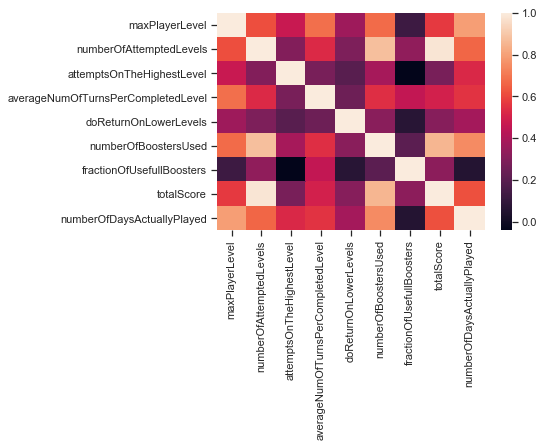

In [22]:
sns.heatmap(X.corr())

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

In [12]:
X.corr()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
maxPlayerLevel,1.000000,0.616157,0.472142,0.757854,0.683706,0.368297,0.675955,0.126235,0.570234,0.551366,0.579593,0.793385
numberOfAttemptedLevels,0.616157,1.000000,0.300797,0.836398,0.531197,0.290636,0.881915,0.332887,0.979954,0.989014,0.993779,0.663450
attemptsOnTheHighestLevel,0.472142,0.300797,1.000000,0.532032,0.277072,0.197035,0.389465,-0.041700,0.277326,0.264804,0.281343,0.524109
totalNumOfAttempts,0.757854,0.836398,0.532032,1.000000,0.509510,0.391969,0.836706,0.128843,0.798051,0.795570,0.808989,0.846448
averageNumOfTurnsPerCompletedLevel,0.683706,0.531197,0.277072,0.509510,1.000000,0.250261,0.543847,0.457168,0.499681,0.489411,0.514770,0.555594
doReturnOnLowerLevels,0.368297,0.290636,0.197035,0.391969,0.250261,1.000000,0.320439,0.071646,0.310218,0.271397,0.288803,0.383024
numberOfBoostersUsed,0.675955,0.881915,0.389465,0.836706,0.543847,0.320439,1.000000,0.203519,0.854263,0.851824,0.862254,0.751712
fractionOfUsefullBoosters,0.126235,0.332887,-0.041700,0.128843,0.457168,0.071646,0.203519,1.000000,0.328287,0.358474,0.358219,0.058929
totalScore,0.570234,0.979954,0.277326,0.798051,0.499681,0.310218,0.854263,0.328287,1.000000,0.985111,0.986423,0.617847
totalBonusScore,0.551366,0.989014,0.264804,0.795570,0.489411,0.271397,0.851824,0.358474,0.985111,1.000000,0.997357,0.606864


## Логистическая регрессия

In [36]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_train_predict = log.predict(X_train)
y_test_predict = log.predict(X_test)

In [37]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8177145116646896 0.7390084190832554 0.5512909979064898


In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_cv=GridSearchCV(log,grid,cv=10)
log_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",log_cv.best_params_)
print("accuracy :",log_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.8243290000494291


In [39]:
log = LogisticRegression(C=0.001)
log.fit(X_train, y_train)
y_train_predict = log.predict(X_train)
y_test_predict = log.predict(X_test)

In [40]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8179122182680901 0.724561403508772 0.5764131193300768


In [ ]:
#Когда были все данные

In [10]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8189007512850929 0.726159230096238 0.5792044661549197


## Линейный SVM

In [1]:
lsvc = LinearSVC(max_iter=100000)
lsvc.fit(X_train, y_train)

NameError: name 'LinearSVC' is not defined

In [ ]:
y_train_predict = lsvc.predict(X_train)
y_test_predict = lsvc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

## SVM

In [14]:
svc = SVC()
svc.fit(X_train, y_train)
y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

In [15]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8230525899565045 0.7271959459459459 0.6008374040474529


### Радиальное ядро

In [11]:
start=time.time()
C_array = np.logspace(2, 4, num=3)
gamma_array = np.logspace(-4, -2, num=3)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)

C:\Users\kotsi\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([  100.,  1000., 10000.]), 'gamma': array([0.0001, 0.001 , 0.01  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
print('%s секунд я ждала'%(time.time()-start))

3099.6276988983154 секунд я ждала, писец


In [6]:
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.16969007958084126
best C      =  100.0
best gamma  =  0.01


In [13]:
svc = SVC(C=100, gamma=0.01)
svc.fit(X_train, y_train)
y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

In [14]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8240411229735073 0.7318531169940222 0.59804605722261


In [16]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (1-err_train, 1-err_test)

0.8325836587415353 0.8240411229735073


### Линейное ядро

In [17]:
C_array = np.logspace(1, 3, num=3)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)

C:\Users\kotsi\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CV error    =  0.17379269437991207
best C      =  100.0


In [18]:
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

CV error    =  0.17379269437991207
best C      =  100.0


In [19]:
svc = SVC(kernel='linear', C=100)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.1731501161583708 0.18011071569790432


In [20]:
y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

In [21]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.8198892843020957 0.7553816046966731 0.5387299371946964


## Дерево принятия решений

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_train_predict = dtc.predict(X_train)
y_test_predict = dtc.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.7552392249901146 0.5664621676891616 0.5799023028611305


In [31]:
param_grid = {'max_depth': np.arange(3, 10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)

C:\Users\kotsi\Anaconda37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print ('CV error    = ', 1 - tree.best_score_)
print ('max depth   = ', tree.best_estimator_.max_depth)

CV error    =  0.17255696703079437
max depth   =  5


In [40]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_train_predict = dtc.predict(X_train)
y_test_predict = dtc.predict(X_test)

In [39]:
print(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))

0.7552392249901146 0.5664621676891616 0.5799023028611305


### Лучший результат на данный момент у SVM на радиальном ядре